# Simple tree graph

In [1]:
!pip install networkx

In [2]:
!pip install matplotlib

In [3]:
import networkx as nx

G = nx.Graph()

In [4]:
G.add_node("A")

In [5]:
G.add_node("B")

In [6]:
G.add_edge("A", "B")

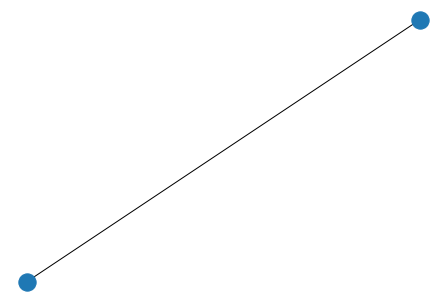

In [7]:
import matplotlib.pyplot as plt
nx.draw_shell(G)

In [8]:
DG = nx.DiGraph()

In [9]:
DG.add_node("A")

In [10]:
DG.add_node("B")

In [11]:
DG.add_edge("A", "B")

In [12]:
DG.add_node("C")

In [13]:
DG.add_edge("A", "C")

In [14]:
DG.add_edge("C", "D")

In [15]:
DG.add_edge("C", "E")

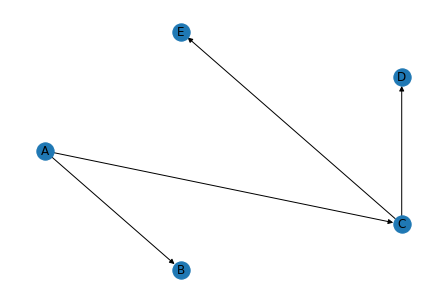

In [16]:
nx.draw_shell(DG,with_labels=True)

In [17]:
import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


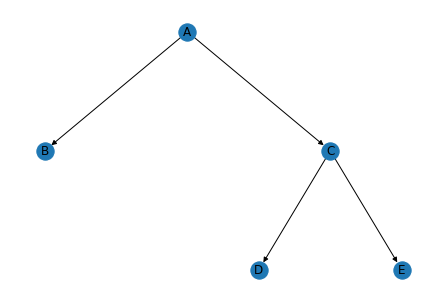

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
pos = hierarchy_pos(DG,"A")    
nx.draw(DG, pos=pos, with_labels=True)
plt.savefig('hierarchy1.png')

In [19]:
DG2 = nx.DiGraph()

In [20]:
DG2.add_edge("A - 7", "B - 3")

In [21]:
DG2.add_edge("A - 7", "C - 8")

In [22]:
DG2.add_edge("C - 8", "D - 4")

In [23]:
DG2.add_edge("C - 8", "E - 1")

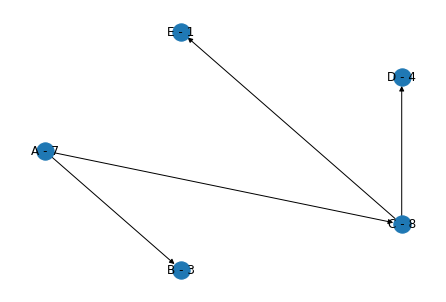

In [24]:
nx.draw_shell(DG2,with_labels=True)

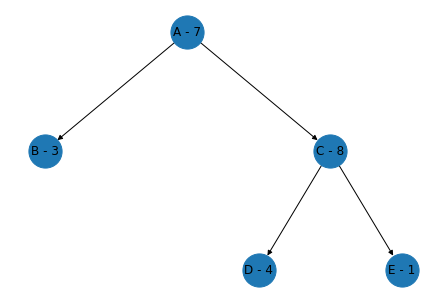

In [25]:
pos2 = hierarchy_pos(DG2,"A - 7")
nx.draw(DG2, pos=pos2, node_size = 1100, with_labels=True)
plt.savefig('hierarchy2.png')